# Makine Öğrenmesi
* Makine Öğrenmesi, matematiksel ve istatistiksel işlemler ile veriler üzerinden çıkarımlar yaparak tahminlerde bulunan sistemlerin bilgisayarlar ile modellemesidir.

### Dört tür makine öğrenme algoritması vardır: denetlenen, yarı denetlenen, denetlenmeyen ve güçlendirme.
1. Denetimli Makine Öğrenmesi.
2. Yarı Denetimli Makine Öğrenmesi.
3. Denetimsiz Makine Öğrenmesi.
4. Takviyeli Makine Öğrenmes

* Makine öğrenmesi hakkında daha fazla bilgi için:
http://www.prowmes.com/blog/makine-ogrenmesi/

* Bu dersimizde denetimli makine öğrenmesinin alt başlıklarından regresyon modellerinden olan lineer regresyon modelini ele alacağız.

# Lineer Regresyon

* Doğrusal regresyon, iki veya daha fazla değişken arasındaki ilişkiyi tanımlamak için kullanılan doğrusal bir modelin yaklaşımıdır.
* Basit doğrusal regresyonda iki değişken vardır: bağımlı değişken ve bağımsız değişken.
* Değişkeni tahmin etmek için bir bağımsız değişken kullanıldığında gerçekleşir.
* Bağımlı değişken(Y): Makine öğrenmesi probleminde tahmin etmek için hedeflediğimiz ana değişkendir. (Araç fiyatı ve benzeri)
* Bağımsız değişken(X): Bağımlı değişkeni tahmin etmemize yardımcı olan değişkendir. (Vites türü, marka ve benzeri)

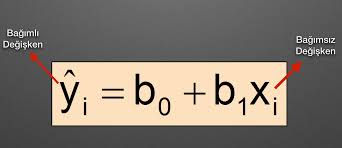

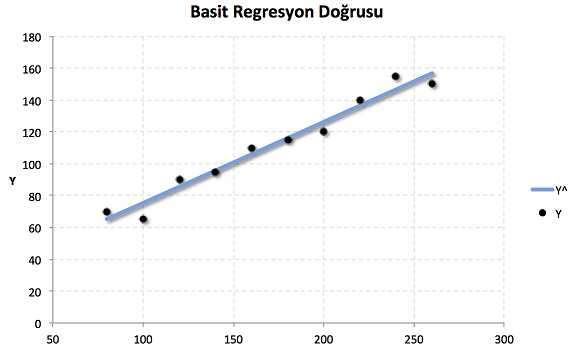

* β0:Doğrunun y-eksenini kestiği yer ve regresyon sabitidir.

* β1:Doğrunun eğimi veya regresyon katsayısıdır

## Veri Setimizde Bu Öğrendiklerimizi Pekiştirelim

* Veri setimizde evin birim alan fiyatını etkileyen özelliklere yer verilmiştir.

In [1]:
import pandas as pd
df = pd.read_excel("../input/real-estate-valuation-dataset/Real estate valuation data set.xlsx")

In [2]:
df.head()

No  X1 transaction date  X2 house age  \
0   1          2012.916667          32.0   
1   2          2012.916667          19.5   
2   3          2013.583333          13.3   
3   4          2013.500000          13.3   
4   5          2012.833333           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

* Veri setimizdeki sütunları türkçeye çevirelim.

In [3]:
df=df.rename(columns={"X1 transaction date":"İşlem Tarihi",
                  "X2 house age":"Ev Yaşı",
                  "X3 distance to the nearest MRT station":"Metroya Olan Uzaklık",
                  "X4 number of convenience stores":"Civardaki Market Sayısı",
                  "X5 latitude":"Enlem",
                  "X6 longitude":"Boylam",
                  "Y house price of unit area":"Birim Alan Fiyatı"})
df.head()

No  İşlem Tarihi  Ev Yaşı  Metroya Olan Uzaklık  Civardaki Market Sayısı  \
0   1   2012.916667     32.0              84.87882                       10   
1   2   2012.916667     19.5             306.59470                        9   
2   3   2013.583333     13.3             561.98450                        5   
3   4   2013.500000     13.3             561.98450                        5   
4   5   2012.833333      5.0             390.56840                        5   

      Enlem     Boylam  Birim Alan Fiyatı  
0  24.98298  121.54024               37.9  
1  24.98034  121.53951               42.2  
2  24.98746  121.54391               47.3  
3  24.98746  121.54391               54.8  
4  24.97937  121.54245               43.1

* Veri setimizde bağımsız değişkenler Ev Yaşı,Metroya Olan Uzaklık ve Civardaki Market Sayısı sütunlarıdır.
* Bağımlı değişken ise Birim Alan Fiyatı sütunudur.

* Lineer regresyon için bir tane bağımsız değişken seçelim.
* Evin metroya olan uzaklık mesafesi birim alan fiyatını nasıl etkilediğini tahmin edelim.
* Bunun için bağımsız değişken(X=Metroya Olan Uzaklık) ve bağmlı değişkeni(Y=Birim Alan Fiyatı) seçelim

In [4]:
X = df[["Metroya Olan Uzaklık"]]#bağımsız değişken
y=df[["Birim Alan Fiyatı"]]#bağımlı değişken

In [5]:
X.head()

Metroya Olan Uzaklık
0              84.87882
1             306.59470
2             561.98450
3             561.98450
4             390.56840

In [6]:
y.head()

Birim Alan Fiyatı
0               37.9
1               42.2
2               47.3
3               54.8
4               43.1

* Tahmin edebilmek için model kurmamız gerekir.
* Bunun için sklearn kütüphanesini kullanacağız.

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model=LinearRegression().fit(X,y)#modeli kurmak

* Formülü tekrar hatırlayalım.(y=b0+b1*x)
* Sklearn kütüphanesinde b0 ve b1 yerine yazacağımız parametler ise intercept_ ve coef_'dir.
* Bu değerleri nasıl öğrenebileceğimize bakalım.

In [9]:
model.intercept_#(b0)

array([45.85142706])

In [10]:
model.coef_#(b1)

array([[-0.00726205]])

* Tahmin işlemi için gerekli katsayıları elde ettik.
* Artık değerleri yerine koyarak tahmin yapabilriz.

In [11]:
45.85142706+(-0.00726205)*X[0:5]

Metroya Olan Uzaklık
0             45.235033
1             43.624921
2             41.770268
3             41.770268
4             43.015100

* Tahmin işlemini kendimiz formülü yazarak yaptık.
* Sklearn kütüphanesinden parametre kullanarak yapabiliriz.

In [12]:
model.predict(X)[0:5]

array([[45.23503269],
       [43.62492052],
       [41.77026661],
       [41.77026661],
       [43.01509918]])

* Başka bir örnek olarak metroya olan uzaklık mesafesi 5,50 ve 500 birim olduğunda birim alan fiyatının ne kadar olduğunu tahmin edelim.

In [13]:
model.predict([[5],[50],[500]])

array([[45.8151168 ],
       [45.48832448],
       [42.22040125]])

* Buraya kadar yaptığımız işlemleri grafik olarak inceleyelim.

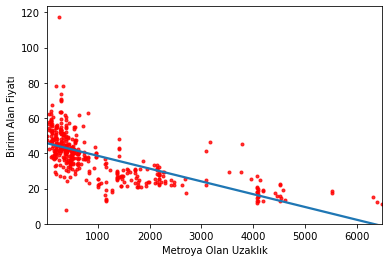

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df["Metroya Olan Uzaklık"], df["Birim Alan Fiyatı"], ci=None, scatter_kws={'color':'r', 's':9})
plt.ylim(bottom=0);

## Hatalar
1. MSE: Hata Kareler Ortalaması

2. RMSE: Hata Kareler Ortalamasının Karekökü

* Tahminlerimizin gerçek değerlere ne kadar yakın olduğu anlamak için hata miktarımızı bulmamız gerekir.

### MSE: Hata Kareler Ortalaması
* Ortalama hata bir makine öğrenmesi modelinin öngördüğü tahmin değerleri ile gerçek değerlerin arasındaki ortalama hatadır. Bu bağlamdaki hata bir ölçümdeki belirsizlik veya tahmini değer ile gerçek değer arasındaki farktır.
**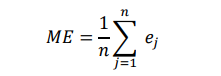**

### RMSE: Hata Kareler Ortalamasının Karekökü
* Bir makine öğrenmesi modelinin, tahminleyicinin tahmin ettiği değerler ile gerçek değerleri arasındaki uzaklığın bulunmasında sıklıkla kullanılan, hatanın büyüklğünü ölçen kuadratik bir metriktir.
* RMSE tahmin hatalarının (kalıntıların) standart sapmasıdır.
**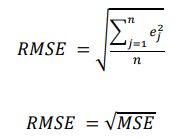**

* Hata miktarını bulmak için gerçek ve tahmin edilen y değerlerini karşılaştıralım.

In [15]:
gercek_y = y[0:10]
tahmin_edilen_y = pd.DataFrame(model.predict(X)[0:10])#numpy array'inden dataframe'ye çevirelim 

In [16]:
hatalar = pd.concat([gercek_y, tahmin_edilen_y], axis = 1)#dataframe'leri birleştirme
hatalar.columns = ["gercek_y","tahmin_edilen_y"]#Sütunlara isim verme
hatalar

gercek_y  tahmin_edilen_y
0      37.9        45.235033
1      42.2        43.624921
2      47.3        41.770267
3      54.8        41.770267
4      43.1        43.015099
5      32.1        30.056247
6      40.3        41.323733
7      46.7        43.762843
8      18.8         5.822723
9      22.1        32.901882

* Gerçek y değerlerini,tahmin edilen y değerlerini,hataları ve hataların karelerini bir dataframe olarak gösterelim.

In [17]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]
hatalar["hata_kareler"] = hatalar["hata"]**2
hatalar

gercek_y  tahmin_edilen_y       hata  hata_kareler
0      37.9        45.235033  -7.335033     53.802704
1      42.2        43.624921  -1.424921      2.030398
2      47.3        41.770267   5.529733     30.577951
3      54.8        41.770267  13.029733    169.773952
4      43.1        43.015099   0.084901      0.007208
5      32.1        30.056247   2.043753      4.176927
6      40.3        41.323733  -1.023733      1.048030
7      46.7        43.762843   2.937157      8.626892
8      18.8         5.822723  12.977277    168.409729
9      22.1        32.901882 -10.801882    116.680652

### MSE: Hata Kareler Ortalamasını Hesaplama
* Hem numpy kütüphanesi ile hemde sklearn kütüphanesi hata değerlerini hesaplayabiliriz.

In [18]:
import numpy as np
np.mean(hatalar["hata_kareler"])

55.51344439230121

In [20]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(gercek_y,tahmin_edilen_y)
MSE

55.51344439230121

### RMSE: Hata Kareler Ortalamasının Karekökünü Hesaplama

In [21]:
RMSE = np.sqrt(MSE)
RMSE

7.450734486767141

# Kaynaklar
* https://medium.com/batech/doğrusal-regresyon-algoritmasının-mantığı-ve-uygulanması-e65a86f806fd#:~:text=Doğrusal%20regresyon%2C%20iki%20veya%20daha,bağımlı%20değişken%20ve%20bağımsız%20değişken.&text=değişkeni%20tahmin%20etmek%20için%20bir%20bağımsız%20değişken%20kullanıldığında%20gerçekleşir.
* https://www.veribilimiokulu.com/basit-dogrusal-regresyon/
* https://veribilimcisi.com/2017/07/14/mse-rmse-mae-mape-metrikleri-nedir/
* http://www.prowmes.com/blog/makine-ogrenmesi/